## PCA

Dimensionality reduction using principal component analysis. 

In [46]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

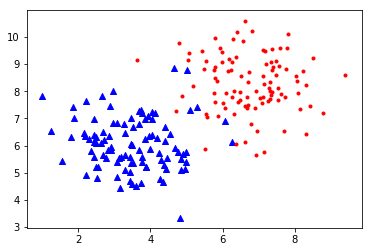

In [6]:
#Dimensionality reduction on the blobs data set.

X, y = make_blobs(n_samples=300)

X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0)
#X = (X - X_mean) / X_std

x0_0 = X[y == 0][:,0]; x1_0 = X[y == 0][:,1];
x0_1 = X[y == 1][:,0]; x1_1 = X[y == 1][:,1]

plt.scatter(x0_0, x1_0, marker='^', c='b')
plt.scatter(x0_1, x1_1, marker='.', c='r')
plt.show()

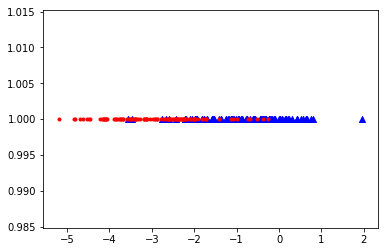

In [7]:
from sklearn.decomposition import PCA

#Reducing the dimensionality to 1D

pca = PCA(n_components=1)
X = pca.fit_transform(X)

x0_0 = X[y == 0][:,0]
x0_1 = X[y == 1][:,0]

l1 = np.array([1 for i in range(x0_0.size)])
l2 = np.array([1 for i in range(x0_1.size)])


plt.scatter(x0_0, l1, marker='^', c='b')
plt.scatter(x0_1, l2, marker='.', c='r')
plt.show()

In [12]:
#get the principal components
print ('components: \n', pca.components_.T)

#get data set variance along each component
print ('variance along components: ', pca.explained_variance_ratio_)

components: 
 [[ 0.03926991]
 [-0.99922864]]
variance along components:  [ 0.73949114]


In [31]:
#get the minimum number of dimensions while preserving 95% of the variance

X, y = make_blobs(n_samples=3000, centers = 2, n_features=100)

#compute PCA without reducing dimensionality.
#How many principal componenets will I need to preserve 95% variance?
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print ('variance ratios (first 10 dimensions): \n', pca.explained_variance_ratio_[0:9])
print ('cumsum of variance ratios (first 10 dimensions): \n', cumsum[0:9])
print ('index of dimension with variance >= 95%: \n', d)

#above is the same as specifying 0-1 in n_components:
#pca = PCA(n_components=0.95)
#X_reduced = pca.fit_transform(X)


variance ratios (first 10 dimensions): 
 [  9.46697762e-01   7.39881268e-04   7.33014086e-04   7.22421319e-04
   7.10723536e-04   7.04835344e-04   7.01729623e-04   6.90202593e-04
   6.88451036e-04]
cumsum of variance ratios (first 10 dimensions): 
 [ 0.94669776  0.94743764  0.94817066  0.94889308  0.9496038   0.95030864
  0.95101037  0.95170057  0.95238902]
index of dimension with variance >= 95%: 
 6


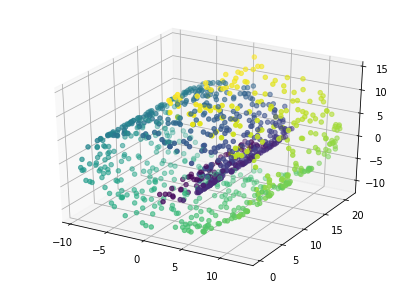

In [47]:
#Visualizing 2 main principal components on the swiss roll data set

X, t = make_swiss_roll(n_samples=1000)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=t)
plt.show()

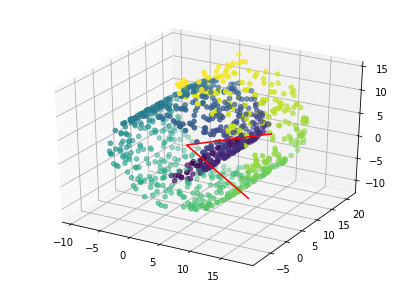

In [48]:
X_centered = X - X.mean(axis=0)

U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

#reduction to 2D
c1 = c1[0:2]
c2 = c2[0:2]

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=t)
ax.plot(20*V.T[:, 0], 20*V.T[:, 1], c='r')

plt.show()    

# Exercise Questions

1. PCA on the MNIST data set

In [2]:
# 1. load MNIST data set
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target

#add bias 
X = np.c_[np.ones((X.shape[0],1)), X]

print ('full data set: ', X.shape)

# 2. do 15% test/train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# 3. train using random forest 
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(verbose=1)
forest_clf.fit(X_train, y_train)

# 4. predict, measure accuracy, performance, train time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print ('\nno dimensionality reduction')

y_pred = forest_clf.predict(X_train)
print ('accuracy: ', accuracy_score(y_train, y_pred))

print ('cross validation scores: ', cross_val_score(forest_clf, X_test, y_test))

full data set:  (70000, 785)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.8s finished



no dimensionality reduction


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


accuracy:  0.999294117647


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


cross validation scores:  [ 0.89069635  0.89882824  0.9070632 ]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [3]:
# 5. do a 95% variance PCA dim reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_r = pca.fit_transform(X)

print ('reduced dimensions: ', X_r.shape)

# 6. repeat training and performance measuremence

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y, test_size=0.15, random_state=42)

random_clf_r = RandomForestClassifier(verbose=1)
random_clf_r.fit(X_train_r, y_train_r)





reduced dimensions:  (70000, 154)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)

In [77]:
y_pred = random_clf_r.predict(X_test_r)
print ('accuracy score: ', accuracy_score(y_test, y_pred))

print ('cross val scores: ', cross_val_score(random_clf_r, X_test_r, y_test_r))

# 7. compare
'''
The reduced data set actually takes longer. This is because of the model we chose, PCA dim reduction is not 
guaranteed to lower training time and can actually make it longer. 
'''


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


accuracy score:  0.891714285714


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


cross val scores:  [ 0.80393836  0.80080023  0.79496711]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


    2. Use PCA to reduce dimesionality to 2D and plot the data

In [4]:
X_r = PCA(n_components=2).fit_transform(X)

print ('reduced dimensions: ', X_r.shape)

reduced dimensions:  (70000, 2)


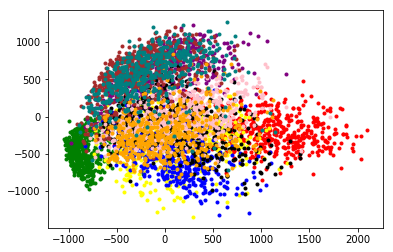

In [43]:

digits = []
for i in range(10):
    digit = X_r[y == i]
    #digits.append((digit[0], digit[1]))
    digits.append(digit)

digits[0].shape

colors = {0:'red', 1:'green', 2:'yellow', 3:'blue', 4:'purple', 5:'black', 6:'pink', 7:'brown', 8:'orange', 9:'teal'}

for i in range(len(digits)):
    digit_x1 = digits[i][:500,0:1]
    digit_x2 = digits[i][:500,1:2]
    plt.scatter(digit_x1, digit_x2, marker = '.', color = colors[i])
plt.show()
